In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Math 6397/CH01

/content/drive/MyDrive/Math 6397/CH01


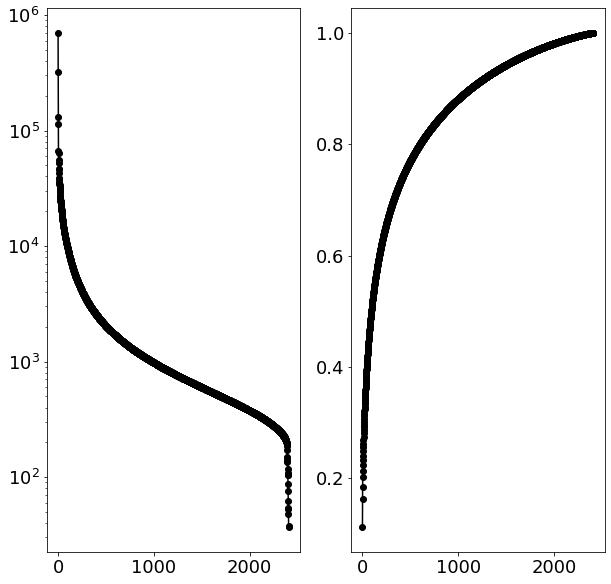

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('..','DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

U, S, VT = np.linalg.svd(faces,full_matrices=False)  #Economy svd

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')    #singular value spectra
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')


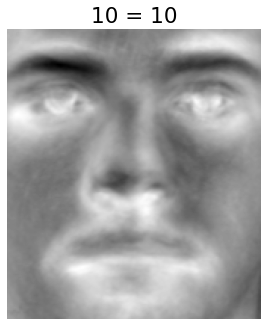

In [4]:
fig1 = plt.figure()
ax= fig1.add_subplot(121)
img_u1 = ax.imshow(np.reshape(U[:,10],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')
plt.title('10 = ' + str(10))

plt.show()

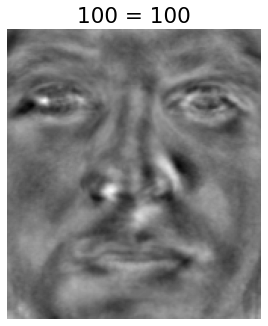

In [5]:
fig1 = plt.figure()
ax= fig1.add_subplot(121)
img_u1 = ax.imshow(np.reshape(U[:,100],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')
plt.title('100 = ' + str(100)) 
plt.show()

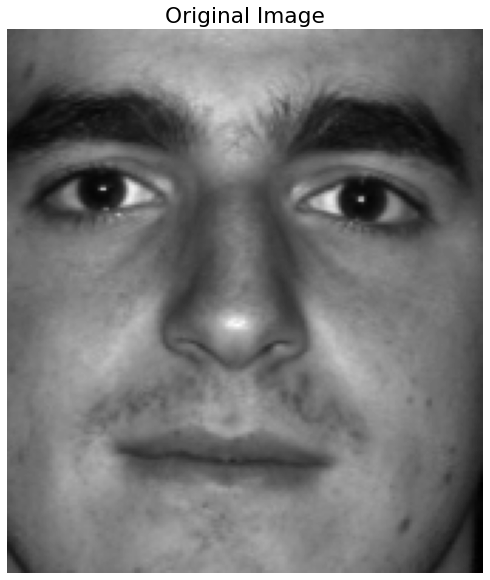

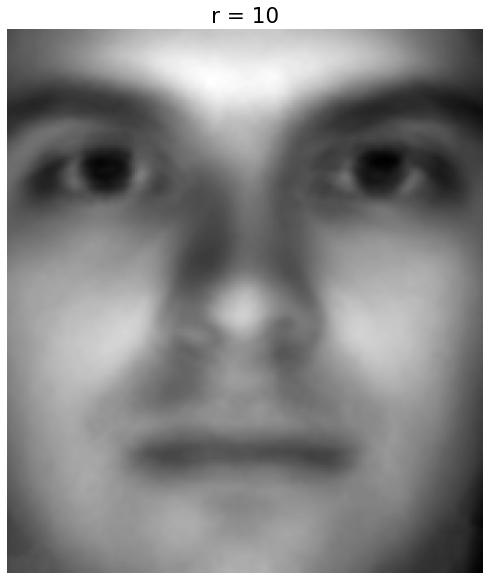

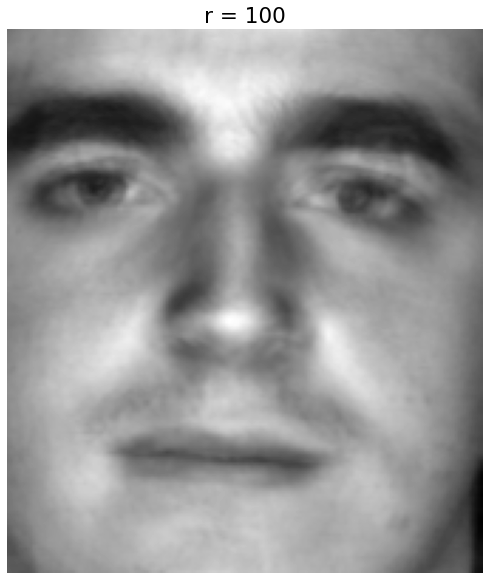

In [6]:
testFace = faces[:,np.sum(nfaces[:37])] 
plt.imshow(np.reshape(testFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

r_list = [10, 100]

for r in r_list:
    reconFace = U[:,:r]  @ U[:,:r].T @ testFace
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()